
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining S&P 500 Sectors.  Construct portfolios from the S&P 500 Sector ETFs and examine the results of different weighting schemes.  In particular, we can select the best performing sectors over a given period.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['etf-galaxy']

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate=0, annual_returns='1 Yr')
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,SD 1 Yr,SD 3 Yr,SD 5 Yr,Annual Returns,Std Dev,Sharpe Ratio
0,SPY,S&P 500 ETF,US Stocks:Large Cap,-56.61,-22.98,10.30,11.22,16.05,19.05,12.89,11.74,17.03,16.72,10.30,17.03,0.60
1,DIA,DJIA ETF,US Stocks:Large Cap,-53.80,-21.72,8.39,9.73,12.79,16.14,10.69,14.10,16.85,16.52,8.39,16.85,0.50
2,QQQ,Nasdaq 100 ETF,US Stocks:Growth,-68.62,-27.47,8.76,13.47,19.36,25.66,18.83,13.26,21.36,21.03,8.76,21.36,0.41
3,VTI,Vanguard Total Stock Market Index ETF,US Stocks:Total Stock Market,-59.66,-25.79,9.43,10.32,15.50,19.44,13.25,12.45,17.45,17.12,9.43,17.45,0.54
4,IWM,Russell 2000 ETF,US Stocks:Small Cap,-68.88,-45.37,0.18,1.81,9.99,20.92,15.35,21.02,23.21,22.20,0.18,23.21,0.01
5,MDY,S&P 400 Midcap ETF,US Stocks:Mid Cap,-60.71,-36.39,0.47,5.54,12.98,20.19,13.51,16.87,20.79,19.83,0.47,20.79,0.02
6,IWD,Russell 1000 Value ETF,US Stocks:Value,-35.87,-13.15,8.38,7.37,12.46,15.01,9.37,13.81,16.87,16.37,8.38,16.87,0.50
7,IWF,Russell 1000 Growth ETF,US Stocks:Growth,-72.08,-33.32,10.76,13.50,18.18,26.66,19.30,14.34,19.95,19.96,10.76,19.95,0.54
8,RSP,S&P 500 Equal Weight ETF,US Stocks:Growth,-38.10,-20.16,5.55,6.28,13.87,15.41,9.32,13.20,18.27,17.93,5.55,18.27,0.30
9,SPSM,S&P 600 Small Cap ETF,US Stocks:Small Cap,-68.29,-46.27,0.22,1.24,11.59,19.98,14.03,21.15,23.04,21.72,0.22,23.04,0.01


In [6]:
# Sector Ranking
sector_rank = bb.rank(df, rank_by='Sharpe Ratio')
sector_rank = sector_rank[sector_rank['Description'].str.contains('Sector ETF')]
#sector_rank = sector_rank.loc[(sector_rank['3 mo'] > 0) & sector_rank['1 Yr'] > 0]
#sector_rank = rank_filtered.head(10)
sector_rank

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,SD 1 Yr,SD 3 Yr,SD 5 Yr,Annual Returns,Std Dev,Sharpe Ratio
22,XLU,S&P500 Utilities Sector ETF,US Stocks:Utilities,-5.60,7.38,28.25,7.25,7.63,18.17,11.05,16.63,16.76,16.92,28.25,16.76,1.69
15,XLC,S&P500 Communication Services Sector ETF,US Stocks:Communication Services,-56.31,-13.24,21.84,14.64,15.65,18.80,12.48,13.53,20.32,19.86,21.84,20.32,1.07
17,XLF,S&P500 Financials Sector ETF,US Stocks:Financials,-49.47,-7.60,20.61,11.52,17.26,21.05,14.80,17.48,20.88,20.02,20.61,20.88,0.99
20,XLP,S&P500 Consumer Staples Sector ETF,US Stocks:Consumer Staples,-14.44,-11.68,7.62,5.67,8.43,16.35,11.48,11.80,13.41,13.74,7.62,13.41,0.57
18,XLI,S&P500 Industrials Sector ETF,US Stocks:Industrials,-44.62,-19.19,8.90,11.71,15.55,18.34,11.51,14.88,19.86,19.28,8.90,19.86,0.45
21,XLRE,S&P500 Real Estate Sector ETF,US Stocks:Real Estate,-12.15,-11.13,7.62,-0.13,5.51,17.42,11.75,18.17,20.80,19.72,7.62,20.80,0.37
24,XLY,S&P500 Consumer Discretionary Sector ETF,US Stocks:Consumer Discretionary,-78.68,-48.33,9.35,6.13,12.61,23.36,17.14,20.01,25.53,23.98,9.35,25.53,0.37
16,XLE,S&P500 Energy Sector ETF,US Stocks:Energy,10.15,1.17,4.27,10.07,25.78,22.95,14.42,14.04,25.66,31.53,4.27,25.66,0.17
19,XLK,S&P500 Technology Sector ETF,US Stocks:Technology,-68.92,-31.97,2.08,13.71,20.63,31.16,22.27,14.93,22.37,21.57,2.08,22.37,0.09
23,XLV,S&P500 Healthcare Sector ETF,US Stocks:Healthcare,-7.08,4.19,0.14,5.36,10.50,12.92,6.81,13.61,13.56,14.85,0.14,13.56,0.01


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# S&P 500 Sectors - top 4
top_sectors_portfolio = {
    'Title': 'Top S&P500 Sectors Portfolio'
}
top_sectors = list(sector_rank['Investment Option'])[:4]
top_sectors_portfolio.update(dict.fromkeys(top_sectors, 1/len(top_sectors)))

# S&P 500 Sectors - all
all_sectors_portfolio = {
    'Title': 'All S&P500 Sectors Portfolio'
}
all_sectors = list(sector_rank['Investment Option'])
all_sectors_portfolio.update(dict.fromkeys(all_sectors, 1/len(all_sectors)))

### Custom Portfolios

In [8]:
# my portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = all_sectors_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': None},
    'Investment Option': {'weight_by': 'DS Vola'},
}

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,XLU,XLC,XLF,XLP,XLI,XLRE,XLY,XLE,XLK,XLV,XLB,All S&P500 Sectors Portfolio
Annual Returns,28.25,21.84,20.61,7.62,8.90,7.62,9.35,4.27,2.08,0.14,-3.11,9.33
Std Dev,16.76,20.32,20.88,13.41,19.86,20.80,25.53,25.66,22.37,13.56,21.08,13.71
Sharpe Ratio,1.69,1.07,0.99,0.57,0.45,0.37,0.37,0.17,0.09,0.01,-65.56,0.68
Weight,0.10,0.09,0.07,0.10,0.10,0.09,0.06,0.08,0.05,0.16,0.10,1.00
Worst Typical Down Year,-5.27,-18.80,-21.15,-19.20,-30.82,-33.98,-41.71,-47.05,-42.66,-26.98,-45.27,-18.09
Black Swan,-22.03,-39.12,-42.03,-32.61,-50.68,-54.78,-67.24,-72.71,-65.03,-40.54,-66.35,-31.80


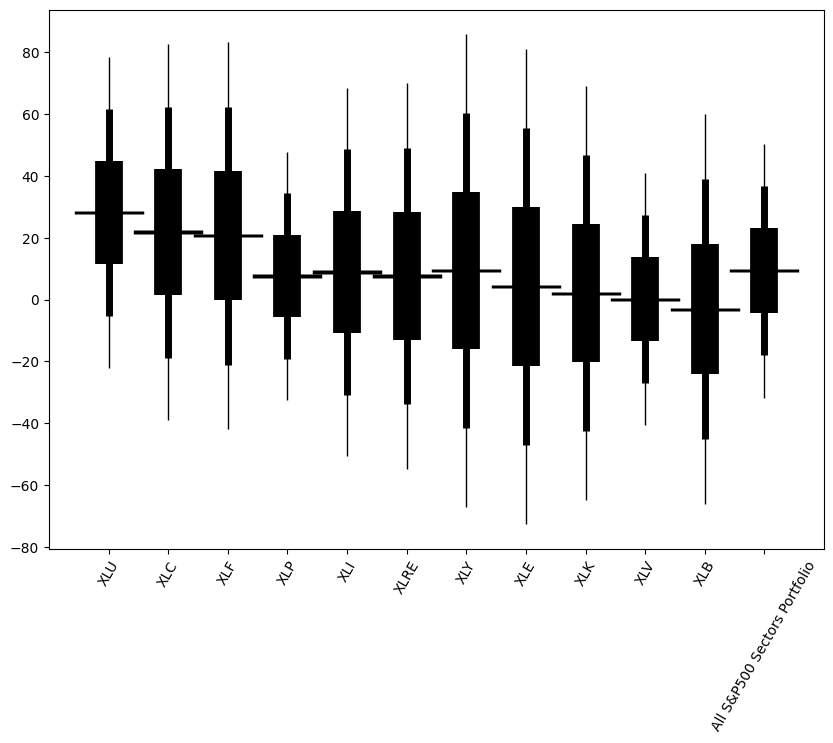

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

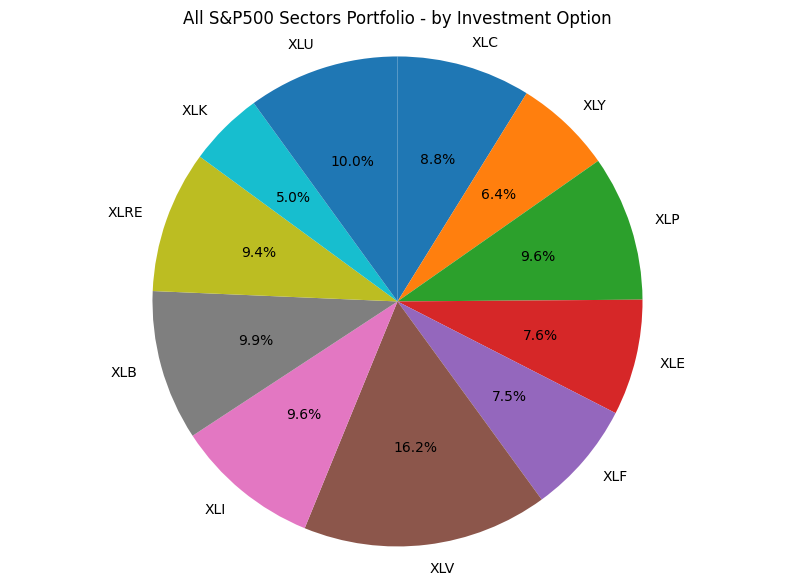

XLC    0.09
XLY    0.06
XLP    0.10
XLE    0.08
XLF    0.07
XLV    0.16
XLI    0.10
XLB    0.10
XLRE   0.09
XLK    0.05
XLU    0.10



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

All S&P500 Sectors Portfolio Weights:
    XLU                            0.0998
    XLC                            0.0884
    XLF                            0.0745
    XLP                            0.0961
    XLI                            0.0958
    XLRE                           0.0939
    XLY                            0.0644
    XLE                            0.0765
    XLK                            0.0495
    XLV                            0.1620
    XLB                            0.0991


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = False

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).